# Notebook for data analysis

We will use Pandas library to get insights for data collected during simulations.

Created using python 3.10.12

Read .csv file into pd.Dataframe object


In [26]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## SELECT MODE ##

mode_ = '"pipelined"' # mode = {parallelized, pipelined}
N = 5 # N = {1,5,10}
p = 0.9 # p = {0.9, 0.99}


#data_dir = "simulation-scenarios/"
#file_name = mode_ + "-N" + str(N) + "-p" + str(int(p * 100)) +".csv"

data_dir = "~/Documents/"
file_name = "gooditems.csv"
df = pd.read_csv(data_dir + file_name)

print(data_dir+file_name)
df

~/Documents/gooditems.csv


,run,N,mode,p,repetition,module,name,value
0,CheckSCA-110-20260114-17:45:30-158157,10,"""parallelized""",0.99,0,Factory.receiver,goodItem:count,94558
1,CheckSCA-111-20260114-17:45:31-158162,10,"""parallelized""",0.99,1,Factory.receiver,goodItem:count,94661
2,CheckSCA-112-20260114-17:45:31-158167,10,"""parallelized""",0.99,2,Factory.receiver,goodItem:count,94554
3,CheckSCA-113-20260114-17:45:33-158173,10,"""parallelized""",0.99,3,Factory.receiver,goodItem:count,94561
4,CheckSCA-114-20260114-17:45:35-158181,10,"""parallelized""",0.99,4,Factory.receiver,goodItem:count,94599
...,...,...,...,...,...,...,...,...
155,CheckSCA-45-20260114-17:44:40-157808,5,"""pipelined""",0.90,5,Factory.receiver,goodItem:count,59112
156,CheckSCA-46-20260114-17:44:40-157813,5,"""pipelined""",0.90,6,Factory.receiver,goodItem:count,59171
157,CheckSCA-47-20260114-17:44:40-157818,5,"""pipelined""",0.90,7,Factory.receiver,goodItem:count,58701
158,CheckSCA-48-20260114-17:44:41-157823,5,"""pipelined""",0.90,8,Factory.receiver,goodItem:count,59029


In [28]:


def varname(var, scope=globals()):
    return [name for name, val in scope.items() if val is var][0]

def descriptive_array(array) :
    if len(array) > 0:
        obs = len(array)
        min = np.min(array)
        max = np.max(array)
        perc_5 = np.quantile(array, 0.05)
        perc_95 = np.quantile(array, 0.95)
        median = np.quantile(array, 0.5)
        mean = np.mean(array)
        variance = np.var(array)
        sd = np.std(array)
        print(
            str(mode_) + " | N=" + str(N) + " | p=" +  str(p) + "\n\n"
            "Descriptive Statistics for "+  varname(array) + ":     \n" +
            "No. of Observations:          " + str(len(array)) + "\n" +
            "Min - Max values:            [" + str(np.min(array)) + ", " + str(np.max(array)) + "]\n" +
            "[0.05, 0.5, 0.95] quantiles: [" + str(np.quantile(array, 0.05)) + ", " + str(np.quantile(array, 0.5)) +  ", " + str(np.quantile(array, 0.95)) +"]\n" + 
            "Mean:                         " + str(np.mean(array)) + "\n" + 
            "Variance (Standard Dev.):     " + str(np.var(array)) + " (" + str(np.std(array)) + ")\n")
    else: 
        print("No observations...")

    return obs, min, max, perc_5, perc_95, median, mean, variance, sd

selcted_df = df[(df['mode'] == mode_) & (df['N'] == N) & (df["p"] == p)]

In [31]:
selcted_df

,run,N,mode,p,repetition,module,name,value
150,CheckSCA-40-20260114-17:44:38-157782,5,"""pipelined""",0.9,0,Factory.receiver,goodItem:count,58907
151,CheckSCA-41-20260114-17:44:39-157787,5,"""pipelined""",0.9,1,Factory.receiver,goodItem:count,59420
152,CheckSCA-42-20260114-17:44:39-157792,5,"""pipelined""",0.9,2,Factory.receiver,goodItem:count,58920
153,CheckSCA-43-20260114-17:44:39-157793,5,"""pipelined""",0.9,3,Factory.receiver,goodItem:count,59253
154,CheckSCA-44-20260114-17:44:40-157803,5,"""pipelined""",0.9,4,Factory.receiver,goodItem:count,58943
155,CheckSCA-45-20260114-17:44:40-157808,5,"""pipelined""",0.9,5,Factory.receiver,goodItem:count,59112
156,CheckSCA-46-20260114-17:44:40-157813,5,"""pipelined""",0.9,6,Factory.receiver,goodItem:count,59171
157,CheckSCA-47-20260114-17:44:40-157818,5,"""pipelined""",0.9,7,Factory.receiver,goodItem:count,58701
158,CheckSCA-48-20260114-17:44:41-157823,5,"""pipelined""",0.9,8,Factory.receiver,goodItem:count,59029
159,CheckSCA-49-20260114-17:44:42-157829,5,"""pipelined""",0.9,9,Factory.receiver,goodItem:count,58829


# Production times of non-defective items

Normality checking

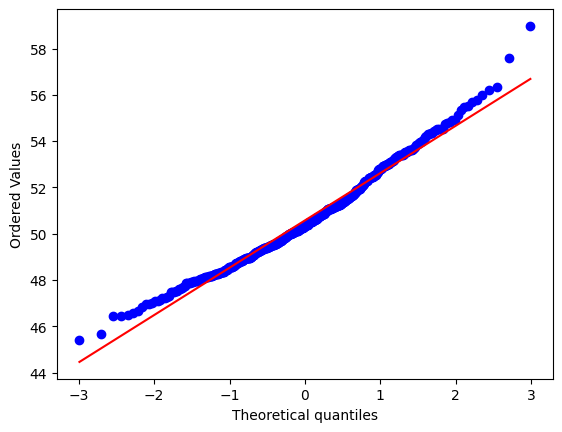

W = 0.9825686416762978
p-value = 1.0598291187861449e-05


In [ ]:
import scipy.stats as stats
from scipy.stats import shapiro

times = df["value"]

stats.probplot(times, dist="norm", plot=plt)
plt.title("")
plt.show()
plt.savefig("images/qqplots/qqplot-" + mode_ + "-N" + str(N) + "-p" + str(p) + ".png")

stat, p = shapiro(times)
print("W =", stat)
print("p-value =", p)

pipelined | N=10 | p=1.0598291187861449e-05

Descriptive Statistics for times:     
No. of Observations:          500
Min - Max values:            [45.40516068011, 58.975744501949]
[0.05, 0.5, 0.95] quantiles: [47.65107158532195, 50.3451849742375, 54.2937113764948]
Mean:                         50.573752727334174
Variance (Standard Dev.):     4.205944068503368 (2.0508398446742175)



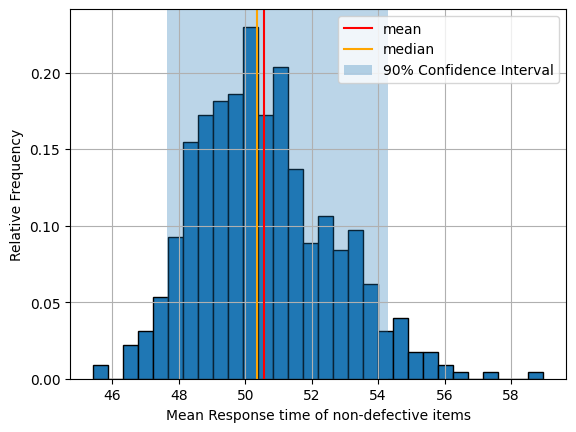

In [ ]:
obs, min, max, perc_5, perc_95, median, mean, variance, sd = descriptive_array(times)
plt.grid()
plt.hist(times, bins = 30, edgecolor = "black", density=True)
plt.axvline(x=mean, color = "red", label="mean")
plt.axvline(x=median, color = "orange", label = "median")
plt.axvspan(perc_5, perc_95, alpha=0.3, label = "90% Confidence Interval")
plt.xlabel("Mean Response time of non-defective items")
plt.ylabel("Relative Frequency")
plt.legend()

plt.show()
plt.savefig("images/histograms/hist-" + mode_ + "-N" + str(N) + "-p" + str(p) + ".png")


In [ ]:
Ns = [1, 5, 10, 20]
ps = [0.9, 0.99]
modes = ['"pipelined"', '"parallelized"']

data_dir = "~/Documents/"
file_name = "gooditems.csv"
df = pd.read_csv(data_dir + file_name)

print(data_dir+file_name)

for N in Ns:
    for p in ps:
        for mode_ in modes:
            selcted_df = df[(df['mode'] == mode_) & (df['N'] == N) & (df["p"] == p)]
            